Objektif yang ingin dicapai antara lain:

- Untuk mengetahui faktor-faktor yang berpengaruh dalam memprediksi total_jumlah_transaksi.
- Dapat memprediksi total_jumlah_transaksi berdasarkan faktor-faktor yang mempengaruhinya menggunakan metode regresi linier.

# IMPORT PUSTAKA

In [1]:
# Import Pustaka
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import OneHotEncoder,LabelEncoder, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# DATA LOADING

In [2]:
# Read Dataset
df = pd.read_csv('dummy-transaksi-ojol-need-clean.csv', sep=';')

# Menampilkan dataset
df

,id,date,mode,from_alamat,from_kelurahan,from_kecamatan,from_latlng,to_alamat,to_kelurahan,to_kecamatan,...,customer_gender,customer_birthdate,driver_id,driver_gender,driver_birthdate,kendaraan_jenis,kendaraan_merk,merchant_id,merchant_name,merchant_category
0,1617,2019/03/09 20:45 s/d 2019/03/09 19:55,BIKE,"Gang Ikhwan No.16, Sungai Jawi",DARAT SEKIP,PONTIANAK KOTA,"-0,0303277,109,297753","Jl. Prof. M.Yamin No.3a, Sungai Bangkong",BENUA MELAYU LAUT,PONTIANAK SELATAN,...,P,1994-02-05T00:00:00,90,L,1997-03-24T00:00:00,MOTOR,Yamaha,NaN,NaN,NaN
1,1297,2019/03/09 19:55 s/d 2019/03/09 19:54,FOOD,"Neo Shabu-Shabu Steak & Shake, Johar, Jl. Joha...",SUNGAI BANGKONG,PONTIANAK KOTA,"-0,02861,109,329253","Jl. Dare Nandong Villa Ria Indah, Tj. Hulu",BANJAR SERASAN,PONTIANAK TIMUR,...,L,2004-04-22T00:00:00,77,L,1976-07-26T00:00:00,MOTOR,BMW,93.0,"Neo Shabu-Shabu Steak & Shake, Johar",RESTAURANT
2,1394,2019/03/09 19:54 s/d 2019/03/09 18:56,SHOP,"Alfamart Pontianak Mall, Jl Teuku Umar",DARAT SEKIP,PONTIANAK KOTA,"-0,0301863,109,3356331","Gg. Gn. Malabar No.21, Sungai Jawi",SUNGAI BELIUNG,PONTIANAK BARAT,...,L,2000-01-07T00:00:00,75,L,1985-12-28T00:00:00,MOTOR,TVS,421.0,Alfamart Pontianak Mall,TOKO/SWALAYAN
3,1120,2019/03/09 18:56 s/d 2019/03/09 12:28,FOOD,"Parklife, Jl. Karimata No.64, Sungai Bangkong,...",MARIANA,PONTIANAK KOTA,"-0,0305815,109,3264009","Unnamed Road, Pal IX",BANGKA BELITUNG DARAT,PONTIANAK TENGGARA,...,L,1987-08-02T00:00:00,82,L,1993-06-10T00:00:00,MOTOR,Suzuki,109.0,Parklife,CAFE
4,2053,2019/03/09 12:28 s/d 2019/03/08 18:25,CAR,"Jl. Tabrani Ahmad No.12, Sungai Jawi Dalam",PAL LIMA,PONTIANAK BARAT,"-0,018461872,109,3075679","Pal IX, Kakap River",BANSIR LAUT,PONTIANAK TENGGARA,...,L,2004-01-23T00:00:00,109,P,1988-05-02T00:00:00,MOBIL,Honda,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1012,1639,2018/09/10 18:28 s/d 2018/09/10 15:29,BIKE,"Gg. Metal, Siantan Hulu",SIANTAN HILIR,PONTIANAK UTARA,"-0,006927295,109,3522482","Gang Jaya Makmur, Kota Baru",KOTA BARU,PONTIANAK SELATAN,...,L,2004-04-22T00:00:00,77,L,1976-07-26T00:00:00,MOTOR,BMW,NaN,NaN,NaN
1013,1123,2018/09/10 15:29 s/d 2018/09/10 14:27,FOOD,"Mekuru Ramen House, Jl. Ketapang No.31, Benua ...",BENUA MELAYU LAUT,PONTIANAK SELATAN,"-0,0331539,109,344327","Jl. Kebangkitan Nasional, Siantan Hulu",BATU LAYANG,PONTIANAK UTARA,...,P,1985-12-24T00:00:00,81,L,1991-09-08T00:00:00,MOTOR,BMW,82.0,Mekuru Ramen House,RESTAURANT
1014,1242,2018/09/10 14:27 s/d 2018/09/10 10:30,FOOD,"Pondok Ale-ale, Gg. Suka Damai No.21, Sungai B...",SUNGAI BANGKONG,PONTIANAK KOTA,"-0,03718,109,325818","Jl. Swadaya, Pal IX",BANGKA BELITUNG LAUT,PONTIANAK TENGGARA,...,L,2002-03-26T00:00:00,93,L,1984-12-26T00:00:00,MOTOR,TVS,16.0,Pondok Ale-ale,RESTAURANT
1015,1779,2018/09/10 10:30 s/d 2018/09/10 09:12,BIKE,"Gg. Dharma Putra 17A, Siantan Hilir",SIANTAN TENGAH,PONTIANAK UTARA,"-0,003775875,109,3458342","Gg. Losari No.16, Sungai Jawi",SUNGAI JAWI LUAR,PONTIANAK BARAT,...,P,1987-07-18T00:00:00,80,L,1987-03-29T00:00:00,MOTOR,TVS,NaN,NaN,NaN


In [3]:
# Menampilkan informasi tiap kolom pada dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017 entries, 0 to 1016
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1017 non-null   int64  
 1   date                      1017 non-null   object 
 2   mode                      1017 non-null   object 
 3   from_alamat               1017 non-null   object 
 4   from_kelurahan            1017 non-null   object 
 5   from_kecamatan            1017 non-null   object 
 6   from_latlng               1017 non-null   object 
 7   to_alamat                 1014 non-null   object 
 8   to_kelurahan              1017 non-null   object 
 9   to_kecamatan              1017 non-null   object 
 10  to_latlng                 1017 non-null   object 
 11  distance                  1017 non-null   float64
 12  amount_delivery           1017 non-null   int64  
 13  amount_merchant           1017 non-null   int64  
 14  transact

In [4]:
# Melihat bentuk dari dataset
df.shape

(1017, 26)

In [5]:
# Melihat 5 Data teratas
df.head()

,id,date,mode,from_alamat,from_kelurahan,from_kecamatan,from_latlng,to_alamat,to_kelurahan,to_kecamatan,...,customer_gender,customer_birthdate,driver_id,driver_gender,driver_birthdate,kendaraan_jenis,kendaraan_merk,merchant_id,merchant_name,merchant_category
0,1617,2019/03/09 20:45 s/d 2019/03/09 19:55,BIKE,"Gang Ikhwan No.16, Sungai Jawi",DARAT SEKIP,PONTIANAK KOTA,"-0,0303277,109,297753","Jl. Prof. M.Yamin No.3a, Sungai Bangkong",BENUA MELAYU LAUT,PONTIANAK SELATAN,...,P,1994-02-05T00:00:00,90,L,1997-03-24T00:00:00,MOTOR,Yamaha,NaN,NaN,NaN
1,1297,2019/03/09 19:55 s/d 2019/03/09 19:54,FOOD,"Neo Shabu-Shabu Steak & Shake, Johar, Jl. Joha...",SUNGAI BANGKONG,PONTIANAK KOTA,"-0,02861,109,329253","Jl. Dare Nandong Villa Ria Indah, Tj. Hulu",BANJAR SERASAN,PONTIANAK TIMUR,...,L,2004-04-22T00:00:00,77,L,1976-07-26T00:00:00,MOTOR,BMW,93.0,"Neo Shabu-Shabu Steak & Shake, Johar",RESTAURANT
2,1394,2019/03/09 19:54 s/d 2019/03/09 18:56,SHOP,"Alfamart Pontianak Mall, Jl Teuku Umar",DARAT SEKIP,PONTIANAK KOTA,"-0,0301863,109,3356331","Gg. Gn. Malabar No.21, Sungai Jawi",SUNGAI BELIUNG,PONTIANAK BARAT,...,L,2000-01-07T00:00:00,75,L,1985-12-28T00:00:00,MOTOR,TVS,421.0,Alfamart Pontianak Mall,TOKO/SWALAYAN
3,1120,2019/03/09 18:56 s/d 2019/03/09 12:28,FOOD,"Parklife, Jl. Karimata No.64, Sungai Bangkong,...",MARIANA,PONTIANAK KOTA,"-0,0305815,109,3264009","Unnamed Road, Pal IX",BANGKA BELITUNG DARAT,PONTIANAK TENGGARA,...,L,1987-08-02T00:00:00,82,L,1993-06-10T00:00:00,MOTOR,Suzuki,109.0,Parklife,CAFE
4,2053,2019/03/09 12:28 s/d 2019/03/08 18:25,CAR,"Jl. Tabrani Ahmad No.12, Sungai Jawi Dalam",PAL LIMA,PONTIANAK BARAT,"-0,018461872,109,3075679","Pal IX, Kakap River",BANSIR LAUT,PONTIANAK TENGGARA,...,L,2004-01-23T00:00:00,109,P,1988-05-02T00:00:00,MOBIL,Honda,NaN,NaN,NaN


In [6]:
# Melihat 5 data terbawah
df.tail()

,id,date,mode,from_alamat,from_kelurahan,from_kecamatan,from_latlng,to_alamat,to_kelurahan,to_kecamatan,...,customer_gender,customer_birthdate,driver_id,driver_gender,driver_birthdate,kendaraan_jenis,kendaraan_merk,merchant_id,merchant_name,merchant_category
1012,1639,2018/09/10 18:28 s/d 2018/09/10 15:29,BIKE,"Gg. Metal, Siantan Hulu",SIANTAN HILIR,PONTIANAK UTARA,"-0,006927295,109,3522482","Gang Jaya Makmur, Kota Baru",KOTA BARU,PONTIANAK SELATAN,...,L,2004-04-22T00:00:00,77,L,1976-07-26T00:00:00,MOTOR,BMW,NaN,NaN,NaN
1013,1123,2018/09/10 15:29 s/d 2018/09/10 14:27,FOOD,"Mekuru Ramen House, Jl. Ketapang No.31, Benua ...",BENUA MELAYU LAUT,PONTIANAK SELATAN,"-0,0331539,109,344327","Jl. Kebangkitan Nasional, Siantan Hulu",BATU LAYANG,PONTIANAK UTARA,...,P,1985-12-24T00:00:00,81,L,1991-09-08T00:00:00,MOTOR,BMW,82.0,Mekuru Ramen House,RESTAURANT
1014,1242,2018/09/10 14:27 s/d 2018/09/10 10:30,FOOD,"Pondok Ale-ale, Gg. Suka Damai No.21, Sungai B...",SUNGAI BANGKONG,PONTIANAK KOTA,"-0,03718,109,325818","Jl. Swadaya, Pal IX",BANGKA BELITUNG LAUT,PONTIANAK TENGGARA,...,L,2002-03-26T00:00:00,93,L,1984-12-26T00:00:00,MOTOR,TVS,16.0,Pondok Ale-ale,RESTAURANT
1015,1779,2018/09/10 10:30 s/d 2018/09/10 09:12,BIKE,"Gg. Dharma Putra 17A, Siantan Hilir",SIANTAN TENGAH,PONTIANAK UTARA,"-0,003775875,109,3458342","Gg. Losari No.16, Sungai Jawi",SUNGAI JAWI LUAR,PONTIANAK BARAT,...,P,1987-07-18T00:00:00,80,L,1987-03-29T00:00:00,MOTOR,TVS,NaN,NaN,NaN
1016,1228,2018/09/10 09:12 s/d 1900/01/00 00:00,FOOD,"Pak Kumis, Jl. Husin Hanzah No.2A, Pal Lima, P...",DARAT SEKIP,PONTIANAK KOTA,"-0,031872,109,293303","Unnamed Road, Parit Tokaya",BENUA MELAYU DARAT,PONTIANAK SELATAN,...,L,1988-05-03T00:00:00,102,P,1993-04-23T00:00:00,MOTOR,Kawasaki,264.0,Pak Kumis,WARUNG MAKAN


In [7]:
# Mengelompokkan tiap kolom berdasarkan kategorikal, int, dan numerikal

# Variabel bertipe kategorik
categorical = list(df.select_dtypes(include=['object']).columns)

# Variabel bertipe int
integer = list(df.select_dtypes(include=['int']).columns)

# Variabel bertipe numerik
numerical = list(df.select_dtypes(exclude=['object']).columns)

# Menampilkan kolom-kolom kategorikal, int, dan numerikal
print('categorical:', categorical, '\n', 'integer:',integer, '\n', 'numerical: ', numerical)

categorical: ['date', 'mode', 'from_alamat', 'from_kelurahan', 'from_kecamatan', 'from_latlng', 'to_alamat', 'to_kelurahan', 'to_kecamatan', 'to_latlng', 'customer_gender', 'customer_birthdate', 'driver_gender', 'driver_birthdate', 'kendaraan_jenis', 'kendaraan_merk', 'merchant_name', 'merchant_category'] 
 integer: ['id', 'amount_delivery', 'amount_merchant', 'transaction_amount_total', 'customer_id', 'driver_id'] 
 numerical:  ['id', 'distance', 'amount_delivery', 'amount_merchant', 'transaction_amount_total', 'customer_id', 'driver_id', 'merchant_id']


In [8]:
# Mengecek missing values pada dataset
df.isnull().sum()

id                            0
date                          0
mode                          0
from_alamat                   0
from_kelurahan                0
from_kecamatan                0
from_latlng                   0
to_alamat                     3
to_kelurahan                  0
to_kecamatan                  0
to_latlng                     0
distance                      0
amount_delivery               0
amount_merchant               0
transaction_amount_total      0
customer_id                   0
customer_gender               0
customer_birthdate            0
driver_id                     0
driver_gender                 0
driver_birthdate              0
kendaraan_jenis               0
kendaraan_merk                0
merchant_id                 567
merchant_name               567
merchant_category           567
dtype: int64

In [9]:
nan_values = df.isna().sum()
print(nan_values)

id                            0
date                          0
mode                          0
from_alamat                   0
from_kelurahan                0
from_kecamatan                0
from_latlng                   0
to_alamat                     3
to_kelurahan                  0
to_kecamatan                  0
to_latlng                     0
distance                      0
amount_delivery               0
amount_merchant               0
transaction_amount_total      0
customer_id                   0
customer_gender               0
customer_birthdate            0
driver_id                     0
driver_gender                 0
driver_birthdate              0
kendaraan_jenis               0
kendaraan_merk                0
merchant_id                 567
merchant_name               567
merchant_category           567
dtype: int64


In [10]:
# Menghitung persentase missing values pada setiap atribut yang bersifat numerikal
df[numerical].apply(lambda x: f'{((x.isnull().sum()/df.shape[0])*100).round(2)} %').sort_values(ascending=True)

id                            0.0 %
distance                      0.0 %
amount_delivery               0.0 %
amount_merchant               0.0 %
transaction_amount_total      0.0 %
customer_id                   0.0 %
driver_id                     0.0 %
merchant_id                 55.75 %
dtype: object

In [11]:
# Menghitung persentase missing values pada setiap atribut yang bersifat categorical
df[categorical].apply(lambda x: f'{((x.isnull().sum()/df.shape[0])*100).round(2)} %').sort_values(ascending=True)

date                    0.0 %
kendaraan_merk          0.0 %
kendaraan_jenis         0.0 %
driver_birthdate        0.0 %
driver_gender           0.0 %
customer_birthdate      0.0 %
customer_gender         0.0 %
to_latlng               0.0 %
to_kecamatan            0.0 %
to_kelurahan            0.0 %
from_latlng             0.0 %
from_kecamatan          0.0 %
from_kelurahan          0.0 %
from_alamat             0.0 %
mode                    0.0 %
to_alamat              0.29 %
merchant_name         55.75 %
merchant_category     55.75 %
dtype: object

In [12]:
# Menghitung persentase missing values pada setiap atribut yang bersifat int
df[integer].apply(lambda x: f'{((x.isnull().sum()/df.shape[0])*100).round(2)} %').sort_values(ascending=True)

id                          0.0 %
amount_delivery             0.0 %
amount_merchant             0.0 %
transaction_amount_total    0.0 %
customer_id                 0.0 %
driver_id                   0.0 %
dtype: object

In [13]:
# Melihat deskripsi statistik dasar dari tiap atribut numerikal
df[numerical].describe()

,id,distance,amount_delivery,amount_merchant,transaction_amount_total,customer_id,driver_id,merchant_id
count,1017.000000,1017.00000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,450.000000
mean,1621.648968,12.51414,8393.313668,27813.667650,36206.981318,38.958702,92.278269,285.235556
std,296.954571,62.16401,5744.174945,34146.272897,34533.405322,21.171922,9.936622,156.184283
min,1101.000000,2.09000,500.000000,0.000000,500.000000,1.000000,75.000000,12.000000
25%,1367.000000,5.25000,4000.000000,0.000000,5000.000000,21.000000,84.000000,100.000000
50%,1624.000000,6.93000,7000.000000,0.000000,19200.000000,40.000000,93.000000,357.500000
75%,1878.000000,9.20000,11000.000000,58500.000000,66000.000000,57.000000,101.000000,421.000000
max,2132.000000,762.13000,32400.000000,100000.000000,117000.000000,74.000000,109.000000,426.000000


In [14]:
# Melihat deskripsi statistik dasar dari tiap atribut int
df[integer].describe()

,id,amount_delivery,amount_merchant,transaction_amount_total,customer_id,driver_id
count,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000
mean,1621.648968,8393.313668,27813.667650,36206.981318,38.958702,92.278269
std,296.954571,5744.174945,34146.272897,34533.405322,21.171922,9.936622
min,1101.000000,500.000000,0.000000,500.000000,1.000000,75.000000
25%,1367.000000,4000.000000,0.000000,5000.000000,21.000000,84.000000
50%,1624.000000,7000.000000,0.000000,19200.000000,40.000000,93.000000
75%,1878.000000,11000.000000,58500.000000,66000.000000,57.000000,101.000000
max,2132.000000,32400.000000,100000.000000,117000.000000,74.000000,109.000000


In [15]:
# Melihat deskripsi statistik dasar dari tiap atribut categorical
df[categorical].describe()

,date,mode,from_alamat,from_kelurahan,from_kecamatan,from_latlng,to_alamat,to_kelurahan,to_kecamatan,to_latlng,customer_gender,customer_birthdate,driver_gender,driver_birthdate,kendaraan_jenis,kendaraan_merk,merchant_name,merchant_category
count,1017,1017,1017,1017,1017,1017,1014,1017,1017,1017,1017,1017,1017,1017,1017,1017,450,450
unique,1017,4,504,29,6,643,733,29,6,1017,2,74,2,35,2,11,78,5
top,2019/03/09 20:45 s/d 2019/03/09 19:55,BIKE,"Unnamed Road, Pal IX",DARAT SEKIP,PONTIANAK KOTA,"-0,008582,109,361511","Unnamed Road, Pal IX",PAL LIMA,PONTIANAK TIMUR,"-0,061345224,109,305406",P,1984-01-08T00:00:00,L,1983-11-23T00:00:00,MOTOR,BMW,Alfamart Siantan Hulu,TOKO/SWALAYAN
freq,1,325,64,92,284,27,76,54,190,1,529,23,728,44,775,216,27,185


In [16]:
df['mode'].value_counts()

BIKE    325
FOOD    265
CAR     242
SHOP    185
Name: mode, dtype: int64

In [17]:
kendaraan = df.groupby(['kendaraan_jenis', 'kendaraan_merk']).size().reset_index()
kendaraan = kendaraan.rename(columns={0: 'total'})
kendaraan

,kendaraan_jenis,kendaraan_merk,total
0,MOBIL,Audi,26
1,MOBIL,BMW,31
2,MOBIL,Honda,64
3,MOBIL,KIA,35
4,MOBIL,Mitsubishi,33
5,MOBIL,Toyota,28
6,MOBIL,Volvo,25
7,MOTOR,BMW,185
8,MOTOR,Honda,146
9,MOTOR,Kawasaki,122


In [18]:
df['merchant_category'].value_counts()

TOKO/SWALAYAN    185
CAFE             113
WARUNG MAKAN      76
RESTAURANT        42
JAJANAN           34
Name: merchant_category, dtype: int64

In [19]:
df['merchant_name'].value_counts()

Alfamart Siantan Hulu       27
Indomaret teuku umar        26
Indomaret Siantan Hilir     24
Indomaret Kota Baru         24
Alfamart Pontianak Mall     22
                            ..
The Flame Grill N Sizzle     2
Canopy Center                2
Raja Uduk                    2
Kings' Kitchen and Bar       1
Pondok Rasa                  1
Name: merchant_name, Length: 78, dtype: int64

In [20]:
merchant = df.groupby(['merchant_category', 'merchant_name']).size().reset_index()
merchant = merchant.rename(columns={0: 'total'})
merchant

,merchant_category,merchant_name,total
0,CAFE,Siobi Pontianak,2
1,CAFE,B?tani Cafe & Resto,3
2,CAFE,Blackball Pontianak,2
3,CAFE,Bolubi Pontianak,6
4,CAFE,Brewings Coffee,4
...,...,...,...
73,WARUNG MAKAN,Waroeng Murni Sari,7
74,WARUNG MAKAN,Warung Haha Hihi,3
75,WARUNG MAKAN,WarungQ,5
76,WARUNG MAKAN,Warunk Naskar,3


# DATA CLEANING

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017 entries, 0 to 1016
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1017 non-null   int64  
 1   date                      1017 non-null   object 
 2   mode                      1017 non-null   object 
 3   from_alamat               1017 non-null   object 
 4   from_kelurahan            1017 non-null   object 
 5   from_kecamatan            1017 non-null   object 
 6   from_latlng               1017 non-null   object 
 7   to_alamat                 1014 non-null   object 
 8   to_kelurahan              1017 non-null   object 
 9   to_kecamatan              1017 non-null   object 
 10  to_latlng                 1017 non-null   object 
 11  distance                  1017 non-null   float64
 12  amount_delivery           1017 non-null   int64  
 13  amount_merchant           1017 non-null   int64  
 14  transact

In [22]:
# Menghilangkan atribut 
df.drop(columns=['id','from_alamat','from_kelurahan','from_kecamatan','to_alamat','to_kelurahan','to_kecamatan','customer_id','driver_id','driver_birthdate','customer_birthdate','date','merchant_name','merchant_category','merchant_id'], inplace=True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017 entries, 0 to 1016
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   mode                      1017 non-null   object 
 1   from_latlng               1017 non-null   object 
 2   to_latlng                 1017 non-null   object 
 3   distance                  1017 non-null   float64
 4   amount_delivery           1017 non-null   int64  
 5   amount_merchant           1017 non-null   int64  
 6   transaction_amount_total  1017 non-null   int64  
 7   customer_gender           1017 non-null   object 
 8   driver_gender             1017 non-null   object 
 9   kendaraan_jenis           1017 non-null   object 
 10  kendaraan_merk            1017 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 87.5+ KB


In [24]:
df2 = df.rename(columns={'from_latlng':'dari_latlng', 'to_latlng': 'ke_latlng', 'distance': 'jarak','amount_delivery': 'jumlah_pengiriman', 
                         'amount_merchant': 'jumlah_merchant','transaction_amount_total': 'total_jumlah_transaksi',
                         'customer_gender': 'jenis_kelamin_pelanggan', 'driver_gender': 'jenis_kelamin_pengemudi', 
                         'kendaraan_jenis': 'jenis_kendaraan', 'kendaraan_merk': 'merk_kendaraan', 'merchant_id': 'ID_toko', 'merchant_name': 'nama_toko', 'merchant_category': 'kategori_toko'})

In [25]:
df2.rename(columns={'jumlah_merchant':'jumlah_toko'}, inplace=True)

In [26]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017 entries, 0 to 1016
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mode                     1017 non-null   object 
 1   dari_latlng              1017 non-null   object 
 2   ke_latlng                1017 non-null   object 
 3   jarak                    1017 non-null   float64
 4   jumlah_pengiriman        1017 non-null   int64  
 5   jumlah_toko              1017 non-null   int64  
 6   total_jumlah_transaksi   1017 non-null   int64  
 7   jenis_kelamin_pelanggan  1017 non-null   object 
 8   jenis_kelamin_pengemudi  1017 non-null   object 
 9   jenis_kendaraan          1017 non-null   object 
 10  merk_kendaraan           1017 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 87.5+ KB


In [27]:
# Melakukan pengecekan duplikasi data
df2.duplicated().sum()

0

In [28]:
df2.isna().sum()

mode                       0
dari_latlng                0
ke_latlng                  0
jarak                      0
jumlah_pengiriman          0
jumlah_toko                0
total_jumlah_transaksi     0
jenis_kelamin_pelanggan    0
jenis_kelamin_pengemudi    0
jenis_kendaraan            0
merk_kendaraan             0
dtype: int64

In [29]:
df2.shape

(1017, 11)

In [30]:
df2.skew()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_7160\834593052.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df2.skew()


jarak                     11.908674
jumlah_pengiriman          1.356483
jumlah_toko                0.686231
total_jumlah_transaksi     0.629906
dtype: float64

## Handling Outlier

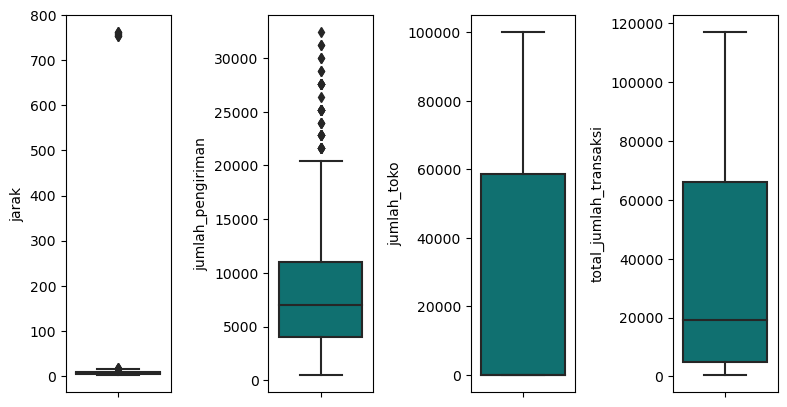

In [31]:
plt.figure(figsize=(10,20))

feat_num = df2.select_dtypes(include=[np.number]).columns.tolist()

for i in range(0, len(feat_num)):
    plt.subplot(5, 5, i+1)
    sns.boxplot(y=df2[feat_num[i]],color='teal', orient='v')
    plt.tight_layout()

## Transformasi Log

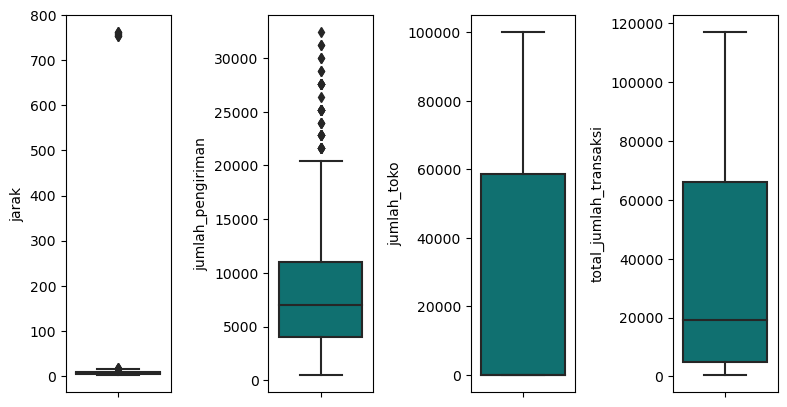

In [32]:
plt.figure(figsize=(10,20))

# plotting
for i in range(0, len(feat_num)):
    plt.subplot(5, 5, i+1)
    sns.boxplot(y=df2[feat_num[i]],color='teal', orient='v')
    plt.tight_layout()

## Imputasi Outlier

In [33]:
def impute_outliers(df2):
    float_cols = df2.select_dtypes(include=['float64']).columns.tolist()
    int_cols = df2.select_dtypes(include=['int64']).columns.tolist()
    
    # Menghapus nilai outlier pada setiap atribut
    for col in float_cols + int_cols:
        Q1 = df2[col].quantile(0.25)
        Q3 = df2[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5*IQR
        upper_bound = Q3 + 1.5*IQR
        
        if col in float_cols:
            df2.loc[df2[col] < lower_bound, col] = df2[col].mean()
            df2.loc[df2[col] > upper_bound, col] = df2[col].mean()
        elif col in int_cols:
            df2.loc[df2[col] < lower_bound, col] = df2[col].mean()
            df2.loc[df2[col] > upper_bound, col] = df2[col].mean()
    
    return df2

df2 = impute_outliers(df2)

## Normalisasi Data

In [34]:
scaler = MinMaxScaler()
num_df_transform = pd.DataFrame(scaler.fit_transform(df2[feat_num]), columns=feat_num)

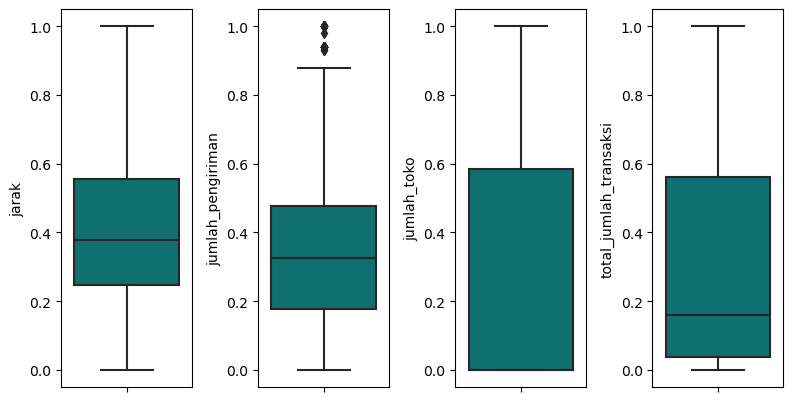

In [35]:
plt.figure(figsize=(10,20))
num_df_column = num_df_transform.columns
# plotting
for i in range(0, len(num_df_column)):
    plt.subplot(5, 5, i+1)
    sns.boxplot(y=num_df_transform[num_df_column[i]],color='teal', orient='v')
    plt.tight_layout()

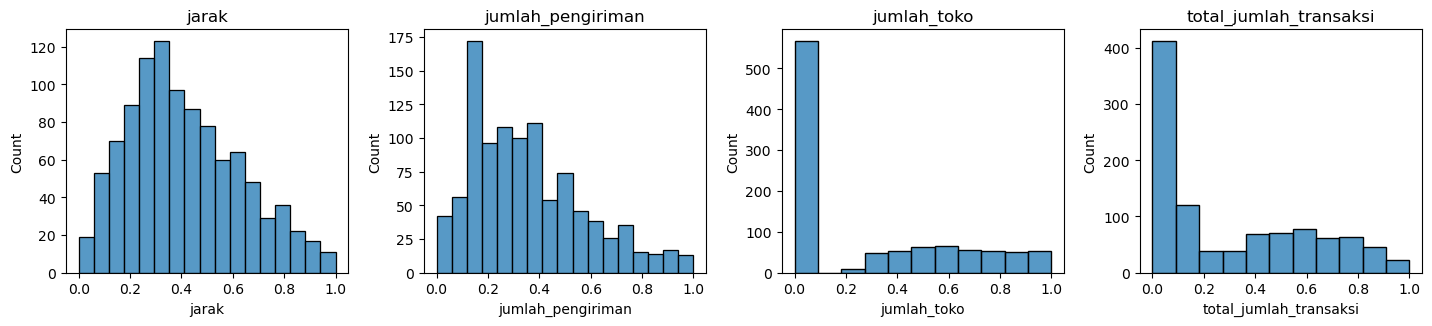

In [36]:
plt.figure(figsize=(18,15))

for i, var in enumerate(num_df_column):
    plt.subplot(5, 5, i+1)
    sns.histplot(num_df_transform[var])
    plt.title(var)

plt.tight_layout()
plt.show()

# EKSPLORASI DATA

In [37]:
# Memperoleh deskripsi statistik dari kolom-kolom yang memiliki tipe data objek/string.
df2.describe(include="O")

,mode,dari_latlng,ke_latlng,jenis_kelamin_pelanggan,jenis_kelamin_pengemudi,jenis_kendaraan,merk_kendaraan
count,1017,1017,1017,1017,1017,1017,1017
unique,4,643,1017,2,2,2,11
top,BIKE,"-0,008582,109,361511","-0,061345224,109,305406",P,L,MOTOR,BMW
freq,325,27,1,529,728,775,216


In [38]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017 entries, 0 to 1016
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mode                     1017 non-null   object 
 1   dari_latlng              1017 non-null   object 
 2   ke_latlng                1017 non-null   object 
 3   jarak                    1017 non-null   float64
 4   jumlah_pengiriman        1017 non-null   float64
 5   jumlah_toko              1017 non-null   float64
 6   total_jumlah_transaksi   1017 non-null   float64
 7   jenis_kelamin_pelanggan  1017 non-null   object 
 8   jenis_kelamin_pengemudi  1017 non-null   object 
 9   jenis_kendaraan          1017 non-null   object 
 10  merk_kendaraan           1017 non-null   object 
dtypes: float64(4), object(7)
memory usage: 87.5+ KB


In [39]:
df2['jenis_kendaraan'].value_counts()

MOTOR    775
MOBIL    242
Name: jenis_kendaraan, dtype: int64

In [40]:
# Melihat persentase jumlah masing-masing merek
datamerk = pd.DataFrame({"Total":df2['jenis_kendaraan'].value_counts(), 
                          "Presentase":(df2['jenis_kendaraan'].value_counts()/df2.shape[0])*100})
datamerk

,Total,Presentase
MOTOR,775,76.204523
MOBIL,242,23.795477


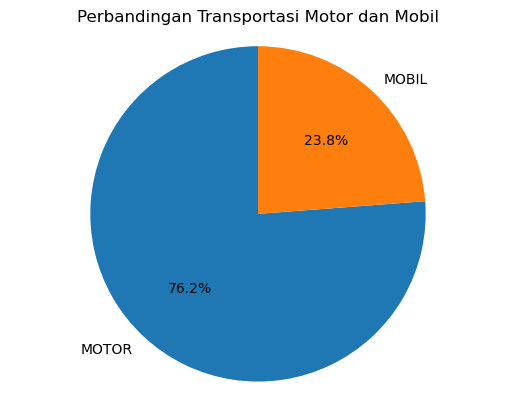

In [41]:
# Visualisasi data dengan pie chart
jumlah = datamerk['Total']
label = ['MOTOR','MOBIL']

plt.pie(jumlah, labels=label, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Perbandingan Transportasi Motor dan Mobil')
plt.show()

# DATA PREPROCECING

In [42]:
df2.drop(columns=['dari_latlng','ke_latlng'], inplace=True)

In [43]:
# Memperbarui list atribut bertipe numerik dan kategorik
categorical = [i for i in df2.columns if df2[i].dtypes == 'O']
numerical = [i for i in df2.columns if i not in categorical] 
print('categorical :', categorical)
print('numerical :', numerical)

categorical : ['mode', 'jenis_kelamin_pelanggan', 'jenis_kelamin_pengemudi', 'jenis_kendaraan', 'merk_kendaraan']
numerical : ['jarak', 'jumlah_pengiriman', 'jumlah_toko', 'total_jumlah_transaksi']


In [44]:
def encode_data(feature_name):
     
    mapping_dict = {}
    unique_values = list(df2[feature_name].unique())
    for idx in range(len(unique_values)):
        mapping_dict[unique_values[idx]] = idx
    print(mapping_dict)
    return mapping_dict

In [45]:
df2['jenis_kelamin_pelanggan'].replace(encode_data('jenis_kelamin_pelanggan'),inplace = True)

{'P': 0, 'L': 1}


In [46]:
df2['jenis_kelamin_pengemudi'].replace(encode_data('jenis_kelamin_pengemudi'),inplace = True)

{'L': 0, 'P': 1}


In [47]:
df2['jenis_kendaraan'].replace(encode_data('jenis_kendaraan'),inplace = True)

{'MOTOR': 0, 'MOBIL': 1}


In [48]:
df2['merk_kendaraan'].replace(encode_data('merk_kendaraan'),inplace = True)

{'Yamaha': 0, 'BMW': 1, 'TVS': 2, 'Suzuki': 3, 'Honda': 4, 'Toyota': 5, 'Kawasaki': 6, 'Mitsubishi': 7, 'KIA': 8, 'Volvo': 9, 'Audi': 10}


In [49]:
df2['mode'].replace(encode_data('mode'),inplace = True)

{'BIKE': 0, 'FOOD': 1, 'SHOP': 2, 'CAR': 3}


In [50]:
# scaler = MinMaxScaler()
# scaled_jarak = scaler.fit_transform(df2[['jarak']])
# df2['jarak'] = scaled_jarak

In [51]:
# scaled_pengiriman = scaler.fit_transform(df2[['jumlah_pengiriman']])
# df2['jumlah_pengiriman'] = scaled_pengiriman

In [52]:
# scaled_toko = scaler.fit_transform(df2[['jumlah_toko']])
# df2['jumlah_toko'] = scaled_toko

In [53]:
# scaled_totaltransaksi = scaler.fit_transform(df2[['total_jumlah_transaksi']])
# df2['total_jumlah_transaksi'] = scaled_toko

In [54]:
df2

,mode,jarak,jumlah_pengiriman,jumlah_toko,total_jumlah_transaksi,jenis_kelamin_pelanggan,jenis_kelamin_pengemudi,jenis_kendaraan,merk_kendaraan
0,0,5.55,2500.0,0.0,2500.0,0,0,0,0
1,1,7.08,9000.0,82000.0,91000.0,1,0,0,1
2,2,4.02,5000.0,58500.0,63500.0,1,0,0,2
3,1,8.94,12000.0,72000.0,84000.0,1,0,0,3
4,3,7.93,14400.0,0.0,14400.0,1,1,1,4
...,...,...,...,...,...,...,...,...,...
1012,0,9.75,5000.0,0.0,5000.0,1,0,0,1
1013,1,7.91,10000.0,35000.0,45000.0,0,0,0,1
1014,1,7.26,9000.0,59000.0,68000.0,1,0,0,2
1015,0,7.50,3500.0,0.0,3500.0,0,0,0,2


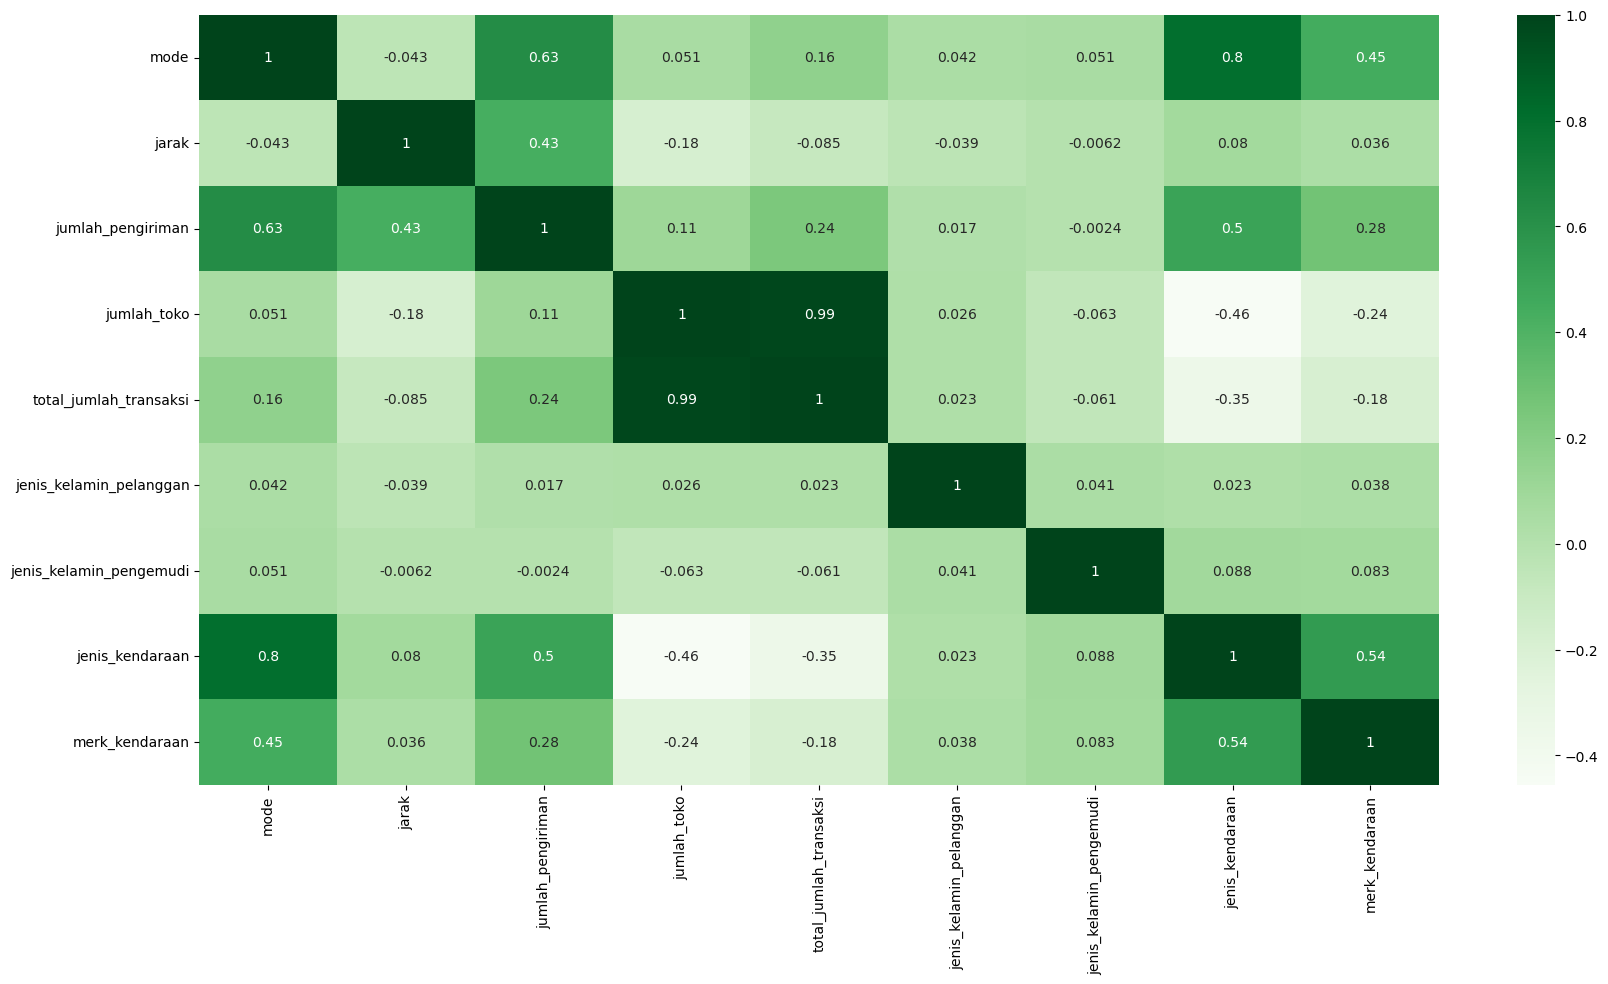

In [55]:
# annot=True digunakan untuk menampilkan nilai korelasi pada setiap kotak pada heatmap
plt.figure(figsize=(20, 10))
ax = sns.heatmap(df2.corr(), annot=True, cmap="Greens")

In [56]:
df2.corr()

,mode,jarak,jumlah_pengiriman,jumlah_toko,total_jumlah_transaksi,jenis_kelamin_pelanggan,jenis_kelamin_pengemudi,jenis_kendaraan,merk_kendaraan
mode,1.000000,-0.042556,0.629110,0.051381,0.161783,0.042412,0.051335,0.802512,0.446176
jarak,-0.042556,1.000000,0.433444,-0.182214,-0.084695,-0.038704,-0.006224,0.080103,0.036300
jumlah_pengiriman,0.629110,0.433444,1.000000,0.107254,0.239061,0.017026,-0.002386,0.499258,0.278320
jumlah_toko,0.051381,-0.182214,0.107254,1.000000,0.986073,0.026091,-0.062994,-0.455392,-0.239644
total_jumlah_transaksi,0.161783,-0.084695,0.239061,0.986073,1.000000,0.022774,-0.060978,-0.348948,-0.182617
jenis_kelamin_pelanggan,0.042412,-0.038704,0.017026,0.026091,0.022774,1.000000,0.040695,0.022546,0.037696
jenis_kelamin_pengemudi,0.051335,-0.006224,-0.002386,-0.062994,-0.060978,0.040695,1.000000,0.088219,0.083441
jenis_kendaraan,0.802512,0.080103,0.499258,-0.455392,-0.348948,0.022546,0.088219,1.000000,0.540371
merk_kendaraan,0.446176,0.036300,0.278320,-0.239644,-0.182617,0.037696,0.083441,0.540371,1.000000


In [57]:
df3 = df2.copy()

In [58]:
df2.shape, df3.shape

((1017, 9), (1017, 9))

In [59]:
# Melakukan inisialisasi variabel X dan y
X = df2.drop(['total_jumlah_transaksi'], axis=1)
y = df2['total_jumlah_transaksi']
print(X.shape)
print(y.shape)

(1017, 8)
(1017,)


In [60]:
bestfeatures = SelectKBest(score_func=f_regression, k=8)

fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']

print("8 Atribut Terbaik")
print(featureScores.nlargest(8,'Score'))

8 Atribut Terbaik
                     Specs         Score
3              jumlah_toko  35679.875366
6          jenis_kendaraan    140.726727
2        jumlah_pengiriman     61.523589
7           merk_kendaraan     35.017159
0                     mode     27.280447
1                    jarak      7.333369
5  jenis_kelamin_pengemudi      3.788206
4  jenis_kelamin_pelanggan      0.526703


In [61]:
X_fit = pd.concat([df3[['jumlah_toko','jenis_kendaraan','jumlah_pengiriman','merk_kendaraan','mode','jarak']]],axis=1)

In [62]:
X_fit

,jumlah_toko,jenis_kendaraan,jumlah_pengiriman,merk_kendaraan,mode,jarak
0,0.0,0,2500.0,0,0,5.55
1,82000.0,0,9000.0,1,1,7.08
2,58500.0,0,5000.0,2,2,4.02
3,72000.0,0,12000.0,3,1,8.94
4,0.0,1,14400.0,4,3,7.93
...,...,...,...,...,...,...
1012,0.0,0,5000.0,1,0,9.75
1013,35000.0,0,10000.0,1,1,7.91
1014,59000.0,0,9000.0,2,1,7.26
1015,0.0,0,3500.0,2,0,7.50


In [63]:
X_fit.shape

(1017, 6)

Setelah diperoleh atribut yang akan dilakukan training, kemudian membagi data menjadi Training dan Testing dengan proporsi 0.7 dan 0.3

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X_fit, y, test_size = 0.3, random_state = 1)

In [65]:
# Mengetahui dimensi data train dan data test
print('Dimensi feature data train :', X_train.shape)
print('Dimensi target data train :', y_train.shape)
print('Dimensi feature data test :', X_test.shape)
print('Dimensi target data test :', y_test.shape)

Dimensi feature data train : (711, 6)
Dimensi target data train : (711,)
Dimensi feature data test : (306, 6)
Dimensi target data test : (306,)


# PENDEFINISIAN MODEL

In [66]:
lr_i = LinearRegression(fit_intercept=False)
lr_m = make_pipeline(StandardScaler(with_mean=True), LinearRegression())
rfr = RandomForestRegressor(n_estimators = 56, random_state = 14)

# PELATIHAN MODEL

In [67]:
lm_1 = lr_i.fit(X_train, y_train)
lm_2 = lr_m.fit(X_train, y_train)
rfr_model = rfr.fit(X_train, y_train)

# EVALUASI MODEL

Linear Regression train R Squared  =  0.9937480403590676
Linear Regression test R Squared   =  0.9946517229208317
Linear Regression test RMSE        =  2483.3307796609756


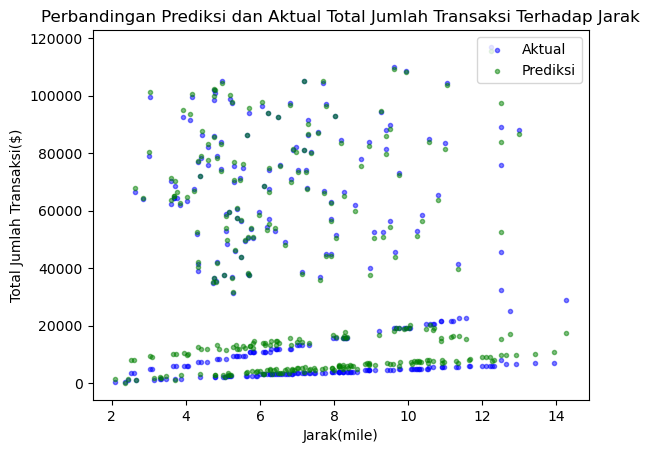

In [68]:
#  MODEL 1


y_pred = lm_1.predict(X_test)

## R-squared data train
lr_train_r2 = lr_i.score(X_train,y_train)
## R-squared data test
lr_test_r2 = lr_i.score(X_test, y_test)

print('Linear Regression train R Squared  = ', lr_train_r2)
print('Linear Regression test R Squared   = ', lr_test_r2)

## Root mean squared error
lr_rmse = np.sqrt(mean_squared_error(y_pred,y_test))
print('Linear Regression test RMSE        = ', lr_rmse)

x_axis = X_test.jarak

## Scatter plot
plt.scatter(x_axis, y_test, c = 'b', alpha = 0.5, marker = '.', label = 'Aktual')
plt.scatter(x_axis, y_pred, c = 'g', alpha = 0.5, marker = '.', label = 'Prediksi')
plt.xlabel('Jarak(mile)')
plt.ylabel('Total Jumlah Transaksi($)') 
plt.title("Perbandingan Prediksi dan Aktual Total Jumlah Transaksi Terhadap Jarak")
plt.legend(loc = 'upper right')
plt.show()

Linear Regression train R Squared  =  0.9955825097763377
Linear Regression test R Squared   =  0.9957079596284739
Linear Regression test RMSE        =  2224.6388703658536


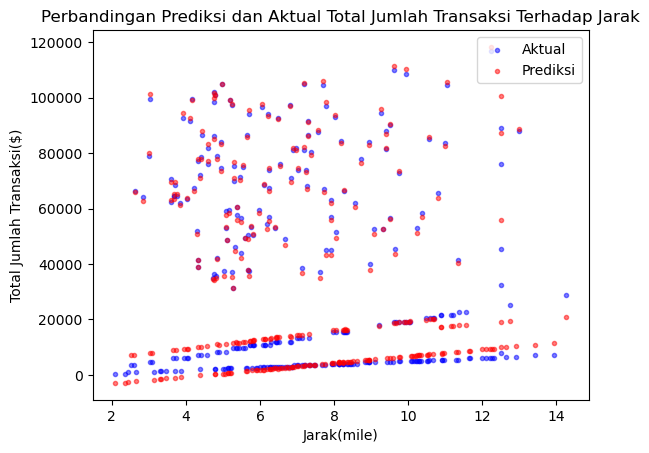

In [69]:
# MODEL 2

y_pred = lm_2.predict(X_test)

## R-squared data train
lr_train2_r2 = lr_m.score(X_train,y_train)
## R-squared data test
lr_test2_r2 = lr_m.score(X_test, y_test)

print('Linear Regression train R Squared  = ', lr_train2_r2)
print('Linear Regression test R Squared   = ', lr_test2_r2)

## Root mean squared error
lr_rmse2 = np.sqrt(mean_squared_error(y_pred,y_test))
print('Linear Regression test RMSE        = ', lr_rmse2)

x_axis = X_test.jarak 

## Scatter plot
plt.scatter(x_axis, y_test, c = 'b', alpha = 0.5, marker = '.', label = 'Aktual')
plt.scatter(x_axis, y_pred, c = 'r', alpha = 0.5, marker = '.', label = 'Prediksi')
plt.xlabel('Jarak(mile)')
plt.ylabel('Total Jumlah Transaksi($)') 
plt.title("Perbandingan Prediksi dan Aktual Total Jumlah Transaksi Terhadap Jarak")
plt.legend(loc = 'upper right')
plt.show()

Random Forest train R Squared  = 1.000
Random Forest test R Squared   = 0.999
Random Forest test RMSE        = 1000.334


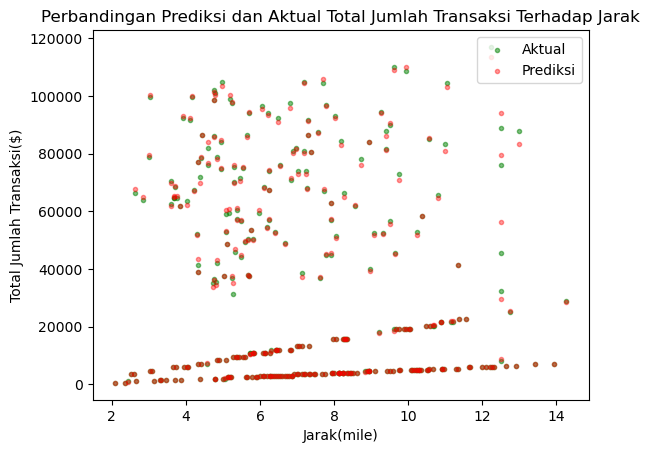

In [70]:
# MODEL 3

y_pred = rfr.predict(X_test)
## R-squared data train
rf_train_r2 = rfr_model.score(X_train,y_train)
## R-squared data test
rf_test_r2 = rfr_model.score(X_test, y_test)

print('Random Forest train R Squared  = %.3f' % rf_train_r2)
print('Random Forest test R Squared   = %.3f' % rf_test_r2)

## Root mean squared error
rf_rmse = np.sqrt(mean_squared_error(y_pred,y_test))
print('Random Forest test RMSE        = %.3f' % rf_rmse)

x_axis = X_test.jarak 

## Scatter plot
plt.scatter(x_axis, y_test, c = 'g', alpha = 0.5, marker = '.', label = 'Aktual')
plt.scatter(x_axis, y_pred, c = 'r', alpha = 0.4, marker = '.', label = 'Prediksi')
plt.xlabel('Jarak(mile)')
plt.ylabel('Total Jumlah Transaksi($)') 
plt.title("Perbandingan Prediksi dan Aktual Total Jumlah Transaksi Terhadap Jarak")
plt.legend(loc = 'upper right')
plt.show()

Berdasarkan nilai evaluasi di atas, Kedua model memiliki nilai R Squared yang cukup tinggi dan hampir sama, yaitu sekitar 0.99, yang menunjukkan model cukup baik dalam menjelaskan variabilitas data. Namun, nilai RMSE pada kedua model sekitar 0.02 dan 0.01 maka keduanya memiliki tingkat kesalahan prediksi yang serupa dan kemungkinan memiliki kualitas yang setara dalam memodelkan data.

Model ketiga yaitu Random Forest hanya digunakan sebagai pembanding antara 2 evaluasi model pertama,model ini memiliki evaluasi model paling baik diantara ketiga model dikarenakan memiliki nilai RMSE yang rendah dam hasil train dan test R squared yang lebih tinggi.

# MODEL INFERENCE

In [71]:
X_fit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017 entries, 0 to 1016
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   jumlah_toko        1017 non-null   float64
 1   jenis_kendaraan    1017 non-null   int64  
 2   jumlah_pengiriman  1017 non-null   float64
 3   merk_kendaraan     1017 non-null   int64  
 4   mode               1017 non-null   int64  
 5   jarak              1017 non-null   float64
dtypes: float64(3), int64(3)
memory usage: 47.8 KB


In [72]:
## Membuat variable data untuk mengisi data baru 
data = {
   'jumlah_toko': [90000],
    'jenis_kendaraan' :[1],
    'jumlah_pengiriman' : [2500],
    'merk_kendaraan' : [1],
    'mode' : [1],
    'jarak' : [7]
}
## Membuat dataframe dari variable 'data' dengan nama X_new
X_new = pd.DataFrame(data)

In [73]:
X_new

,jumlah_toko,jenis_kendaraan,jumlah_pengiriman,merk_kendaraan,mode,jarak
0,90000,1,2500,1,1,7


In [74]:
y_pred_new = lm_1.predict(X_new)
print('Hasil prediksi total harga transaksi baru :', y_pred_new)

Hasil prediksi total harga transaksi baru : [101700.18325153]


Hasil prediksi total harga transaksi baru yaitu Rp 101.700,00